In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns 
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [3]:
data = pd.read_csv("/content/Lung Cancer Dataset.csv")
data.head(10)

,GD,AG,SM,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP,LC
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [4]:
data.tail()

,GD,AG,SM,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP,LC
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [5]:
#Shape of Data
data.shape

(309, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GD      309 non-null    object
 1   AG      309 non-null    int64 
 2   SM      309 non-null    int64 
 3   YF      309 non-null    int64 
 4   AN      309 non-null    int64 
 5   PP      309 non-null    int64 
 6   CD      309 non-null    int64 
 7   FT      309 non-null    int64 
 8   AL      309 non-null    int64 
 9   WH      309 non-null    int64 
 10  AC      309 non-null    int64 
 11  CF      309 non-null    int64 
 12  SB      309 non-null    int64 
 13  SD      309 non-null    int64 
 14  CP      309 non-null    int64 
 15  LC      309 non-null    object
dtypes: int64(14), object(2)
memory usage: 38.8+ KB


In [7]:
#lets describe the data
data.describe()

,AG,SM,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
data.count()

GD    309
AG    309
SM    309
YF    309
AN    309
PP    309
CD    309
FT    309
AL    309
WH    309
AC    309
CF    309
SB    309
SD    309
CP    309
LC    309
dtype: int64

In [9]:
label_encoder = preprocessing.LabelEncoder()
data['GD']= label_encoder.fit_transform(data['GD'])
  
data['GD'].unique()

array([1, 0])

In [10]:
label_encoder = preprocessing.LabelEncoder()
data['LC']= label_encoder.fit_transform(data['LC'])
  
data['LC'].unique()

array([1, 0])

In [11]:
data.describe()

,GD,AG,SM,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP,LC
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


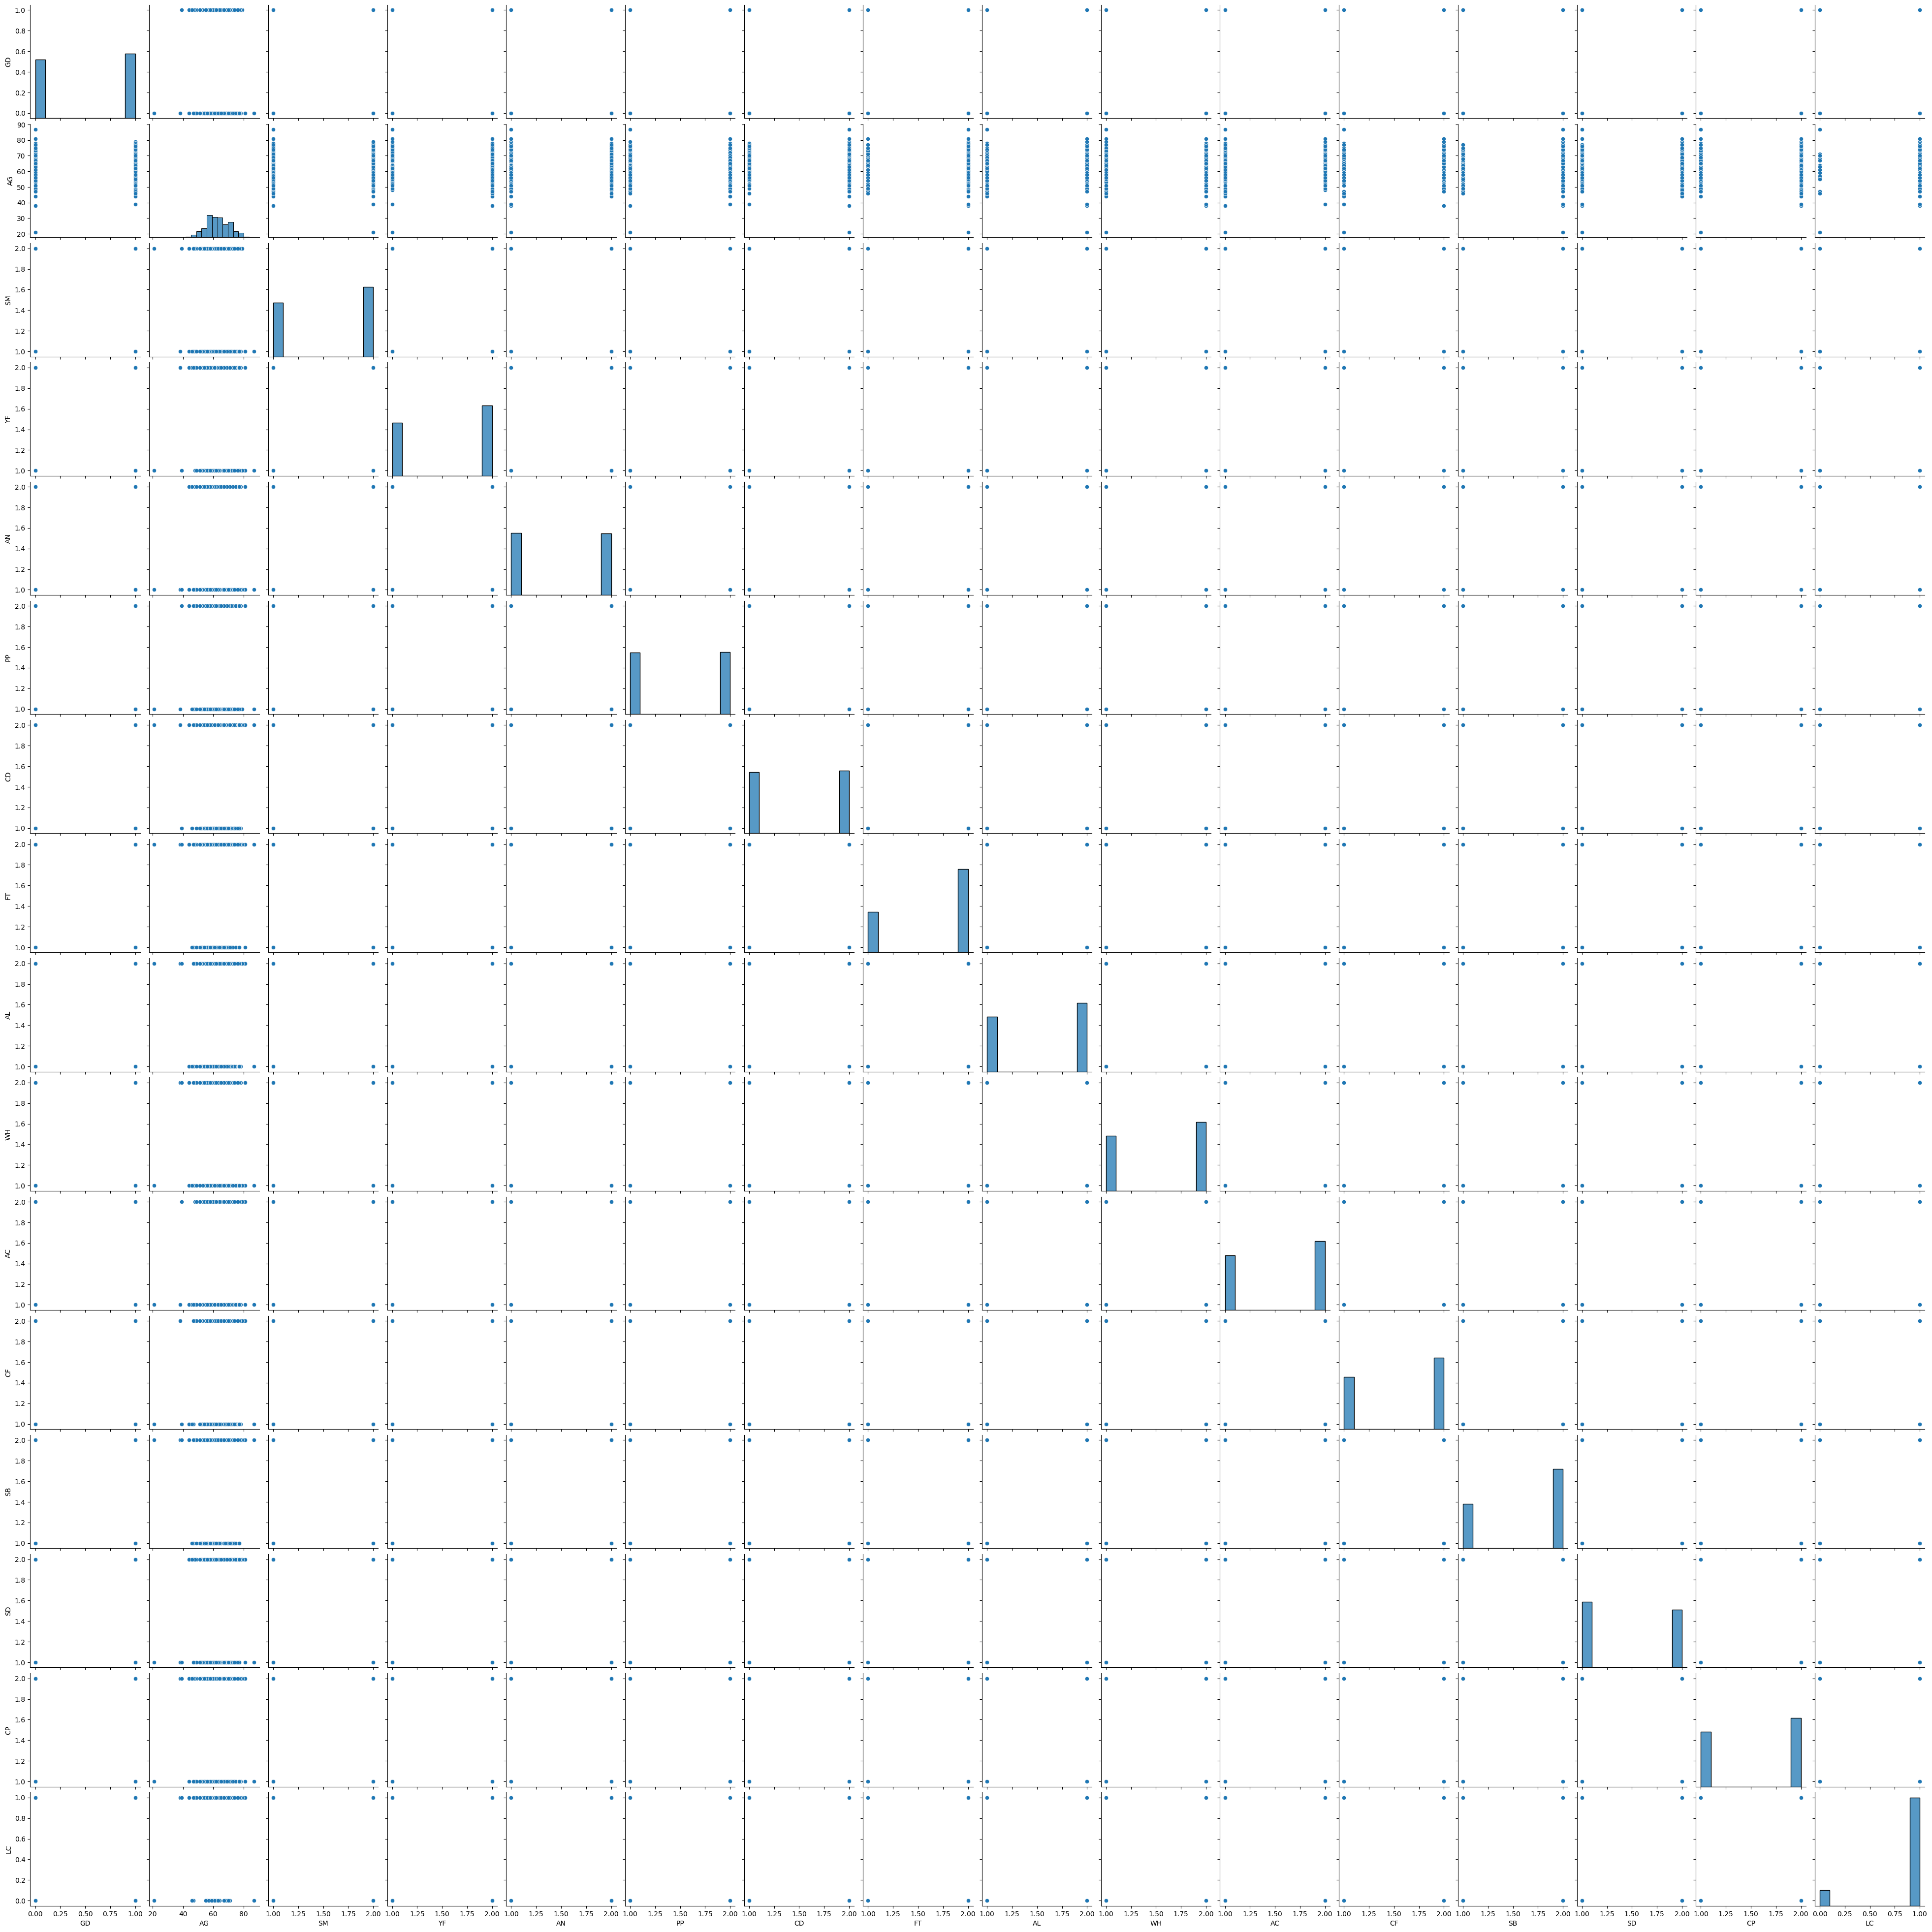

In [12]:
sns.pairplot(data)

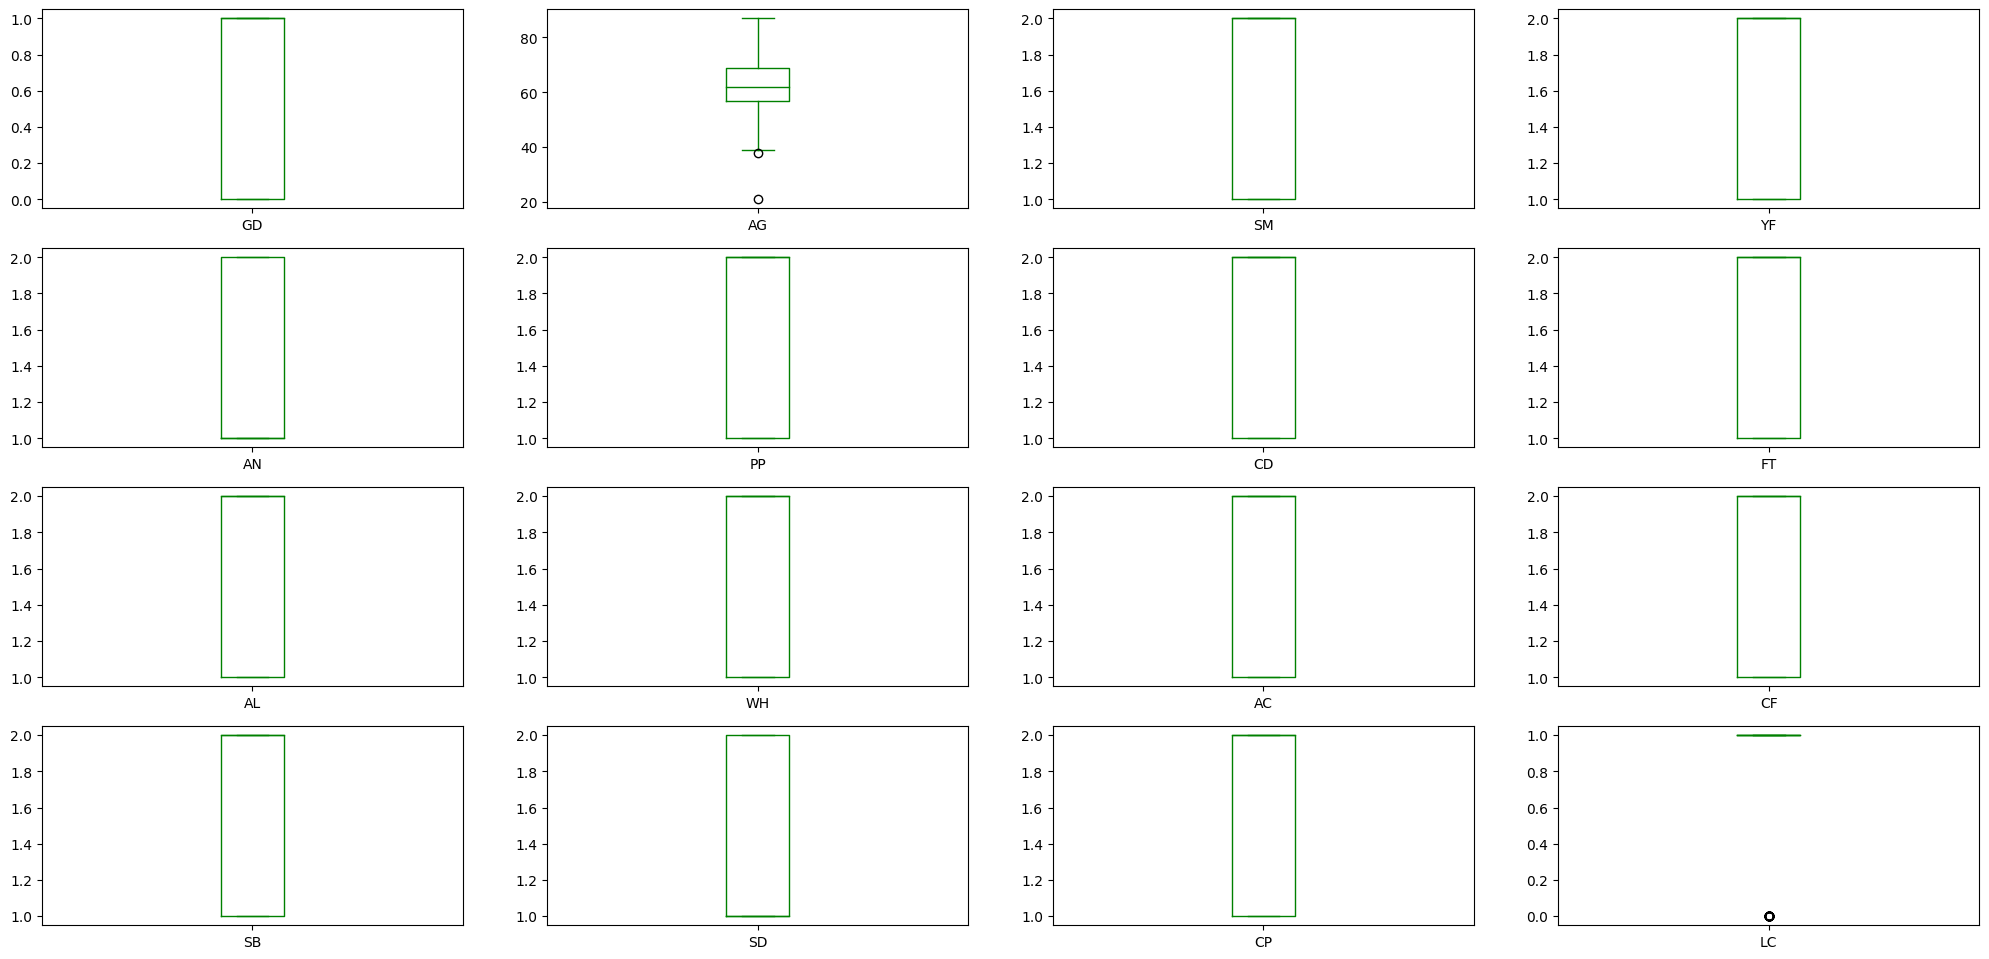

In [13]:
data.plot(color = 'green', kind='box', figsize=(25, 15), subplots=True, layout=(5,4))
plt.show()

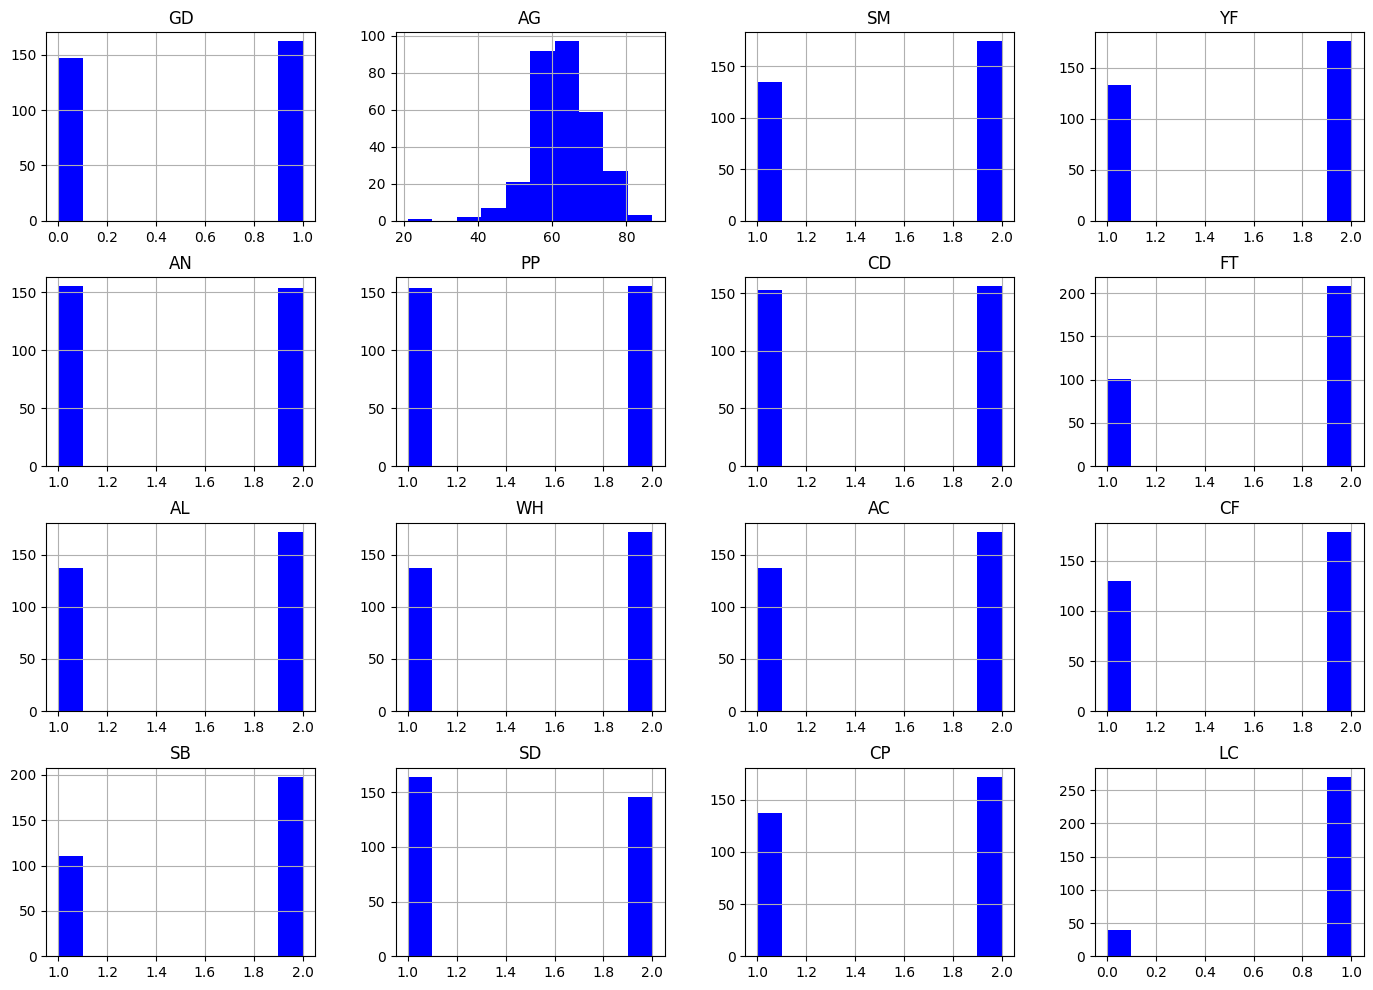

In [14]:
#histogram
data.hist(color='blue',bins=10,figsize=(17,12))
plt.show()

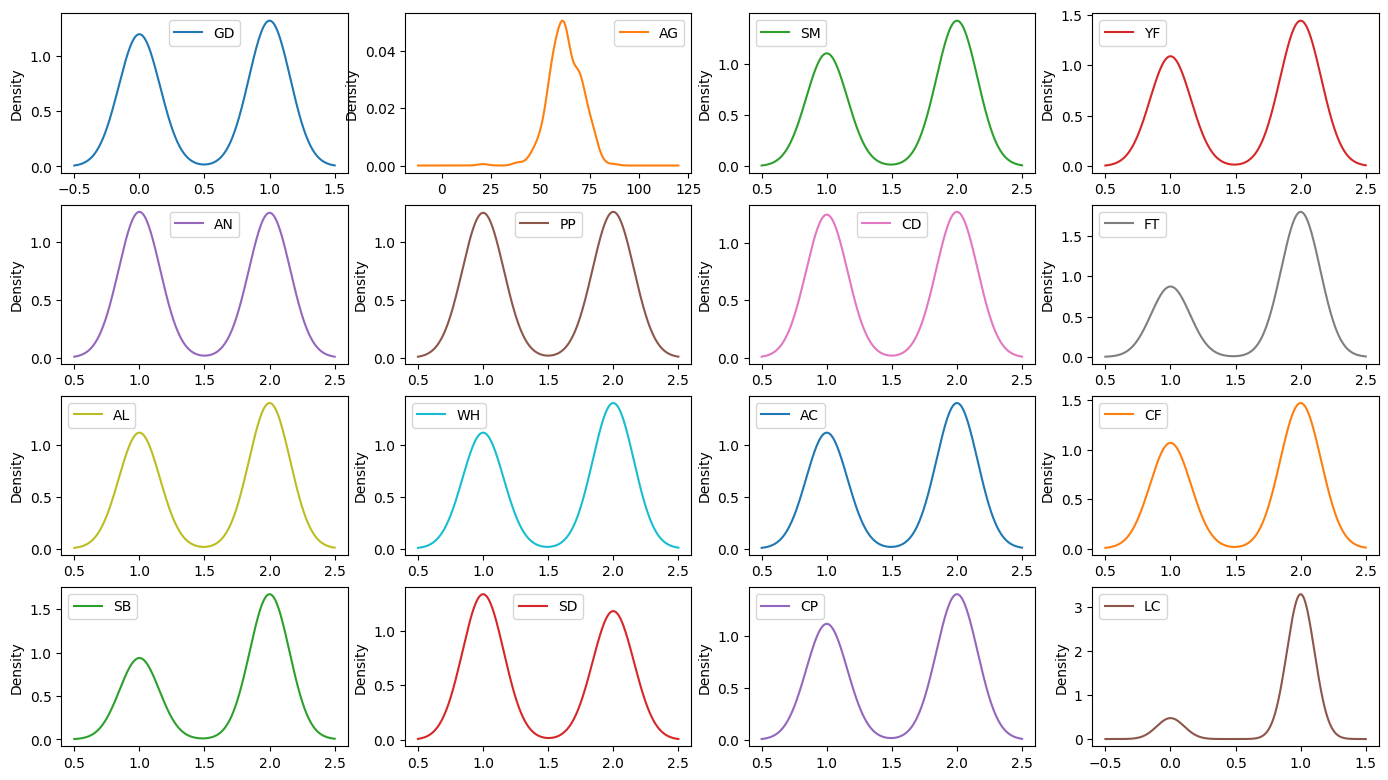

In [15]:
#Boxplot of each column
data.plot( kind='density', figsize=(17,12), subplots=True, layout=(5,4),sharex=False)

plt.show()


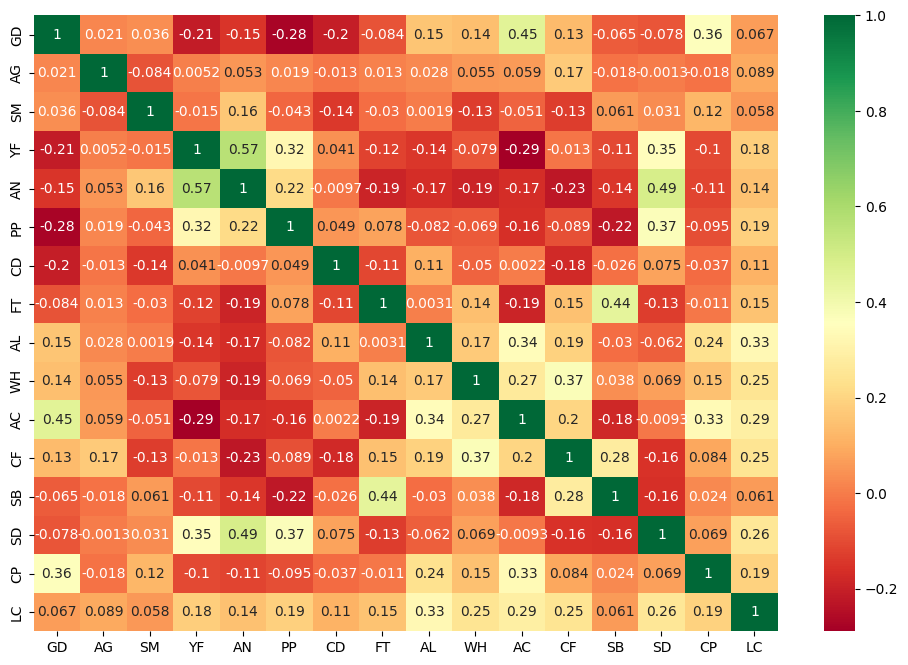

In [16]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
#checking for the out layers with STD
print("Highest allowed",data['AG'].mean() + 3*data['AG'].std())
print("Lowest allowed",data['AG'].mean() - 3*data['AG'].std())

Highest allowed 87.30404332223404
Lowest allowed 38.04223499491806


In [23]:
#dealing with out layer values 
data[(data['AG'] > 87) | (data['AG'] < 45)]


,GD,AG,SM,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP,LC
20,0,44.000000,2,2,2,2,2,2,1,1,1,1,2,2,1,1
22,0,38.042235,2,1,1,1,2,2,2,1,1,1,2,1,1,0
168,1,44.000000,1,2,1,2,2,2,1,2,1,1,2,2,2,1
238,0,38.042235,1,2,1,1,2,2,2,2,1,2,2,1,2,1
261,1,39.000000,2,1,1,2,1,2,2,2,2,1,2,1,2,1


In [24]:
new_df = data[(data['AG'] <87) & (data['AG'] >45)]
new_df

,GD,AG,SM,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP,LC
0,1,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56.0,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70.0,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58.0,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67.0,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [25]:
#storing the values 
upper_limit = data['AG'].mean() + 3*data['AG'].std()
lower_limit = data['AG'].mean() - 3*data['AG'].std()

In [26]:
data['AG'] = np.where(
    data['AG']>upper_limit,
    upper_limit,
    np.where(
        data['AG']<lower_limit,
        lower_limit,
        data['AG']
    )
)

<ipython-input-27-22e5af389daa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AG'])
<ipython-input-27-22e5af389daa>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['AG'])


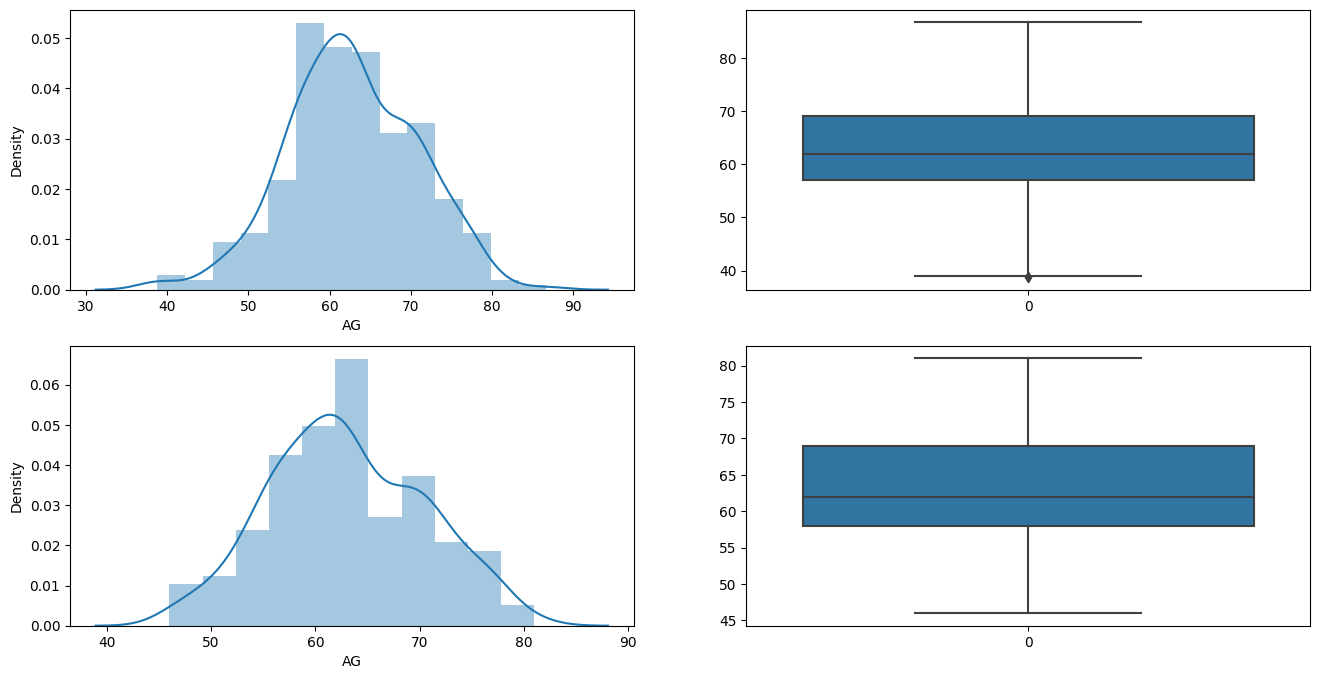

In [27]:
#ploting the outlayer removing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['AG'])
plt.subplot(2,2,2)
sns.boxplot(data['AG'])
plt.subplot(2,2,3)
sns.distplot(new_df['AG'])
plt.subplot(2,2,4)
sns.boxplot(new_df['AG'])
plt.show()

<Axes: >

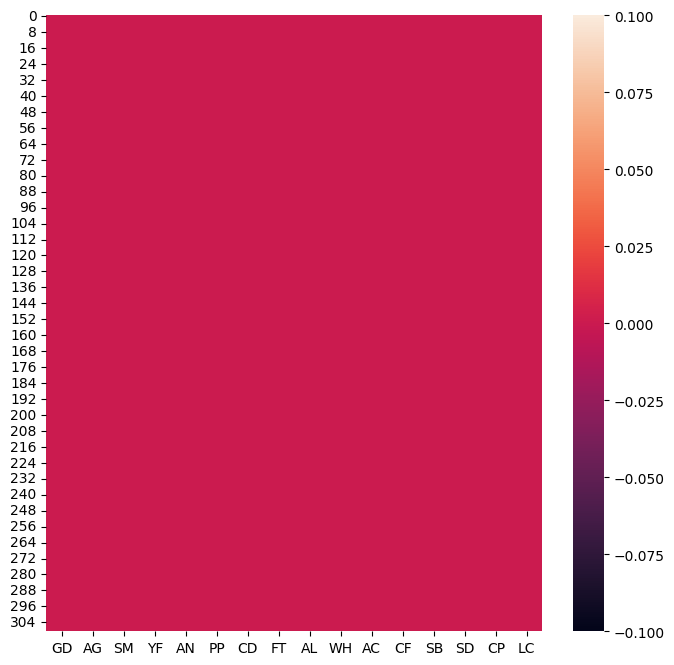

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [29]:
data_boxcox = data.copy()
X = data_boxcox.drop(['LC'],axis=1)
Y = data_boxcox['LC']

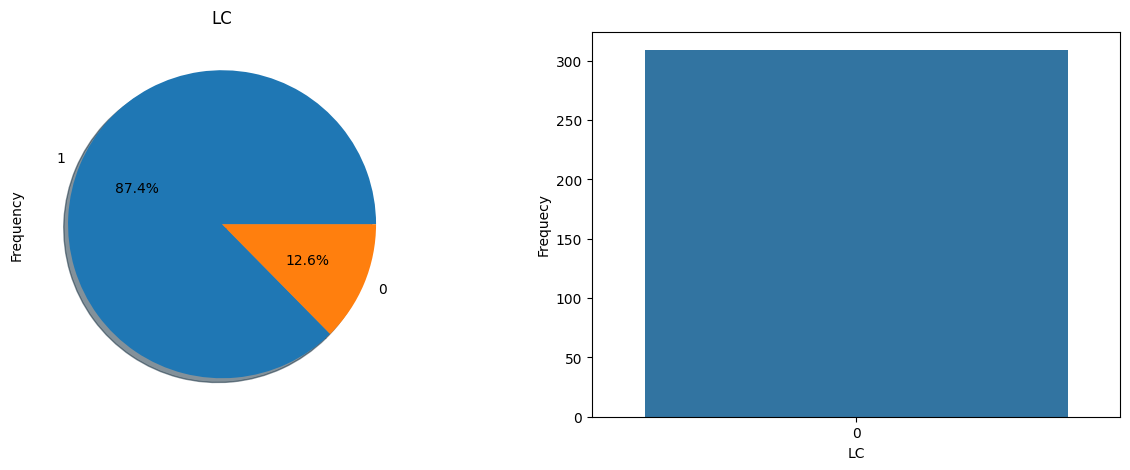

In [30]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(data['LC'])
#plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("LC")
plt.ylabel("Frequecy")

#Piechart show
data['LC'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('LC')
ax[0].set_ylabel('Frequency')
plt.show()

In [37]:

#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.LC==1]
df_minority = data_bal[data_bal.LC==0]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class
df_manjority_downsampled = resample(df_majority,replace=False,n_samples=150,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.LC.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_Upsampled = resample(df_minority,replace=True,n_samples=500,random_state=123)
df_Upsampled = pd.concat([df_majority,df_minority_Upsampled])
print("Upsampled data:->\n",df_Upsampled.LC.value_counts())

Downsampled data:->
 1    150
0     39
Name: LC, dtype: int64
Upsampled data:->
 0    500
1    270
Name: LC, dtype: int64


Text(0.5, 0, 'Outcome')

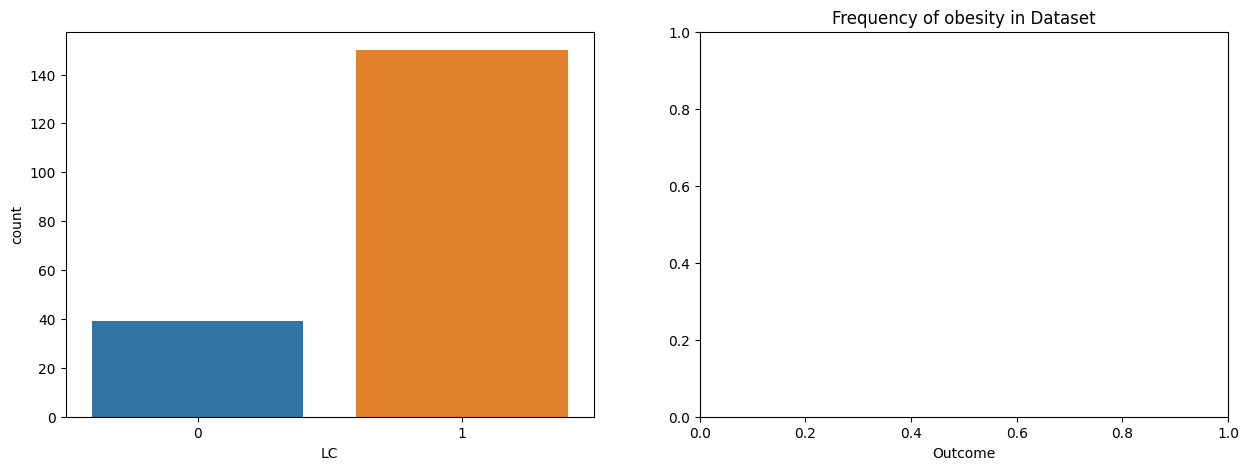

In [39]:
#Plot the diabetic Values
# f,ax=plt.subplots(1,2,figsize=(15,5))
# sns.countplot(df_downsampled['NObeyesdad'])
# plt.title("Frequency of Heart Disease in Dataset")
# plt.xlabel("NObeyesdad")
# plt.ylabel("Frequecy")
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='LC', data=df_downsampled, ax=ax[0])
plt.title("Frequency of obesity in Dataset")
plt.xlabel("Outcome")

#Piechart show
# df_downsampled['NObeyesdad'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('NObeyesdad')
# ax[0].set_ylabel('Frequency')
# plt.show()

Text(0.5, 0, 'Outcome')

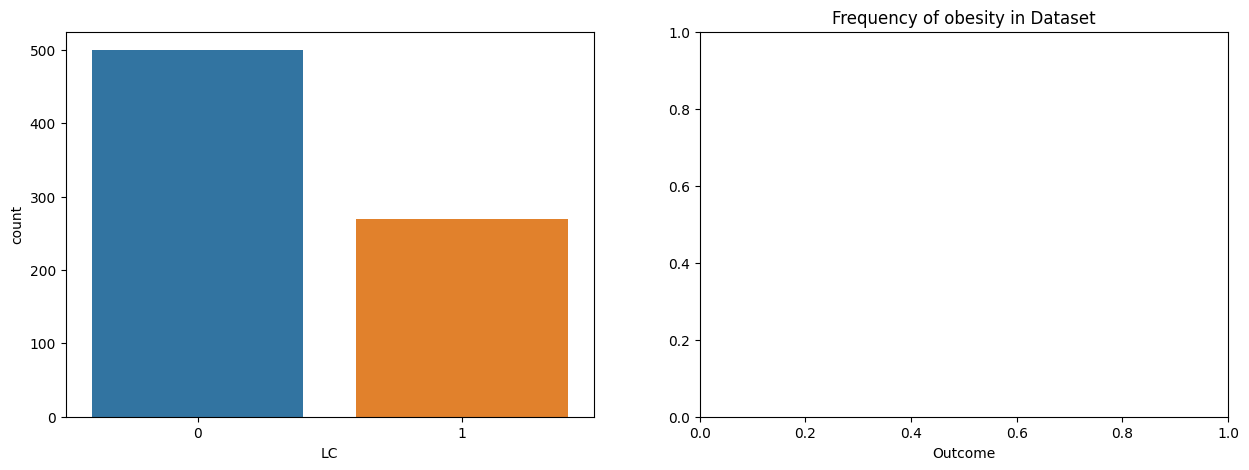

In [40]:
# #Plot the diabetic Values
# f,ax=plt.subplots(1,2,figsize=(15,5))
# sns.countplot(df_Upsampled['NObeyesdad'])
# plt.title("Frequency of Heart Disease in Dataset")
# plt.xlabel('NObeyesdad')
# plt.ylabel("Frequecy")
# #Piechart show
# df_Upsampled['NObeyesdad'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('NObeyesdad')
# ax[0].set_ylabel('Frequency')
# plt.show()
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='LC', data=df_Upsampled, ax=ax[0])
plt.title("Frequency of obesity in Dataset")
plt.xlabel("Outcome")

In [41]:
#lets describe the data
df_Upsampled.describe().T

,count,mean,std,min,25%,50%,75%,max
GD,770.0,0.462338,0.498904,0.000000,0.0,0.0,1.0,1.000000
AG,770.0,61.545327,8.012494,38.779015,57.0,62.0,67.0,86.677842
SM,770.0,1.523377,0.499778,1.000000,1.0,2.0,2.0,2.000000
YF,770.0,1.432468,0.495740,1.000000,1.0,1.0,2.0,2.000000
AN,770.0,1.374026,0.484185,1.000000,1.0,1.0,2.0,2.000000
PP,770.0,1.354545,0.478686,1.000000,1.0,1.0,2.0,2.000000
CD,770.0,1.436364,0.496256,1.000000,1.0,1.0,2.0,2.000000
FT,770.0,1.557143,0.497047,1.000000,1.0,2.0,2.0,2.000000
AL,770.0,1.306494,0.461337,1.000000,1.0,1.0,2.0,2.000000
WH,770.0,1.353247,0.478289,1.000000,1.0,1.0,2.0,2.000000


In [42]:
#lets describe the data
df_downsampled.describe().T

,count,mean,std,min,25%,50%,75%,max
GD,189.0,0.486772,0.501153,0.000000,0.0,0.0,1.0,1.000000
AG,189.0,62.641460,8.122944,38.779015,57.0,63.0,69.0,86.677842
SM,189.0,1.571429,0.496186,1.000000,1.0,2.0,2.0,2.000000
YF,189.0,1.560847,0.497602,1.000000,1.0,2.0,2.0,2.000000
AN,189.0,1.476190,0.500759,1.000000,1.0,1.0,2.0,2.000000
PP,189.0,1.497354,0.501321,1.000000,1.0,1.0,2.0,2.000000
CD,189.0,1.518519,0.500984,1.000000,1.0,2.0,2.0,2.000000
FT,189.0,1.629630,0.484186,1.000000,1.0,2.0,2.0,2.000000
AL,189.0,1.534392,0.500141,1.000000,1.0,2.0,2.0,2.000000
WH,189.0,1.523810,0.500759,1.000000,1.0,2.0,2.0,2.000000


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import itertools
import xgboost as xgb

In [44]:
from sklearn import  metrics 
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier(learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#confusion_matrix(XGBR,X_test,y_test,labels=["Heart Disease","No-Heart Disease"],cm=plt.cm.Blues)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       103
           1       0.93      1.00      0.96        51

    accuracy                           0.97       154
   macro avg       0.96      0.98      0.97       154
weighted avg       0.98      0.97      0.97       154

0.974025974025974


In [45]:
data.columns

Index(['GD', 'AG', 'SM', 'YF', 'AN', 'PP', 'CD', 'FT', 'AL', 'WH', 'AC', 'CF',
       'SB', 'SD', 'CP', 'LC'],
      dtype='object')

In [46]:
featur_names = ['GD', 'AG', 'SM', 'YF', 'AN', 'PP', 'CD', 'FT', 'AL', 'WH', 'AC', 'CF',
       'SB', 'SD', 'CP', 'LC']
features = XGBR.feature_importances_
features

array([0.03117774, 0.03284387, 0.031178  , 0.03141223, 0.22817157,
       0.03102936, 0.03111849, 0.03146624, 0.03427578, 0.03075552,
       0.03173008, 0.0314565 , 0.03150108, 0.36156297, 0.03032063],
      dtype=float32)

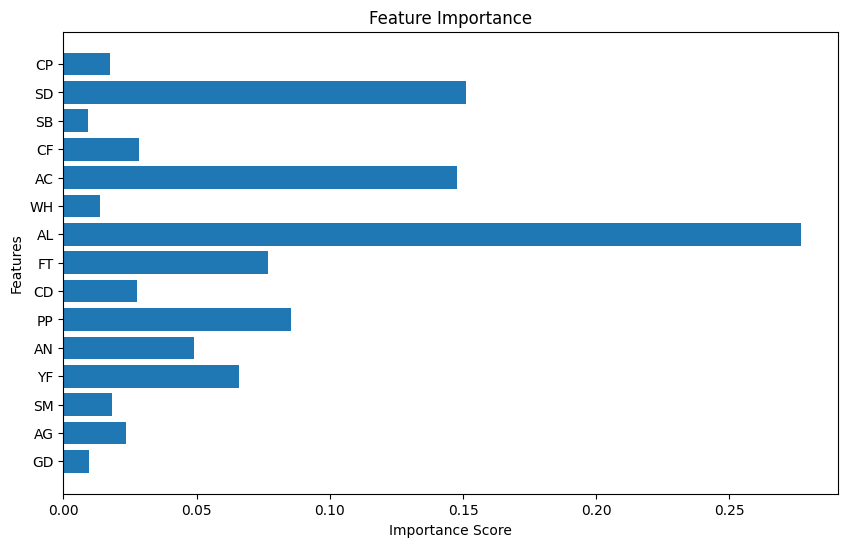

In [48]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = xgbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [51]:
X = np.array(df_Upsampled[['GD', 'AG', 'SM', 'YF', 'AN', 'PP', 'CD', 'FT', 'AL', 'WH', 'AC', 'CF',
       'SB', 'SD', 'CP', 'LC']])
Y = np.array(df_Upsampled.LC.T)
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("LightGBM",LGBMClassifier()))
models.append(("Catboost",CatBoostClassifier()))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       103
           1       0.93      1.00      0.96        51

    accuracy                           0.97       154
   macro avg       0.96      0.98      0.97       154
weighted avg       0.98      0.97      0.97       154

0.974025974025974


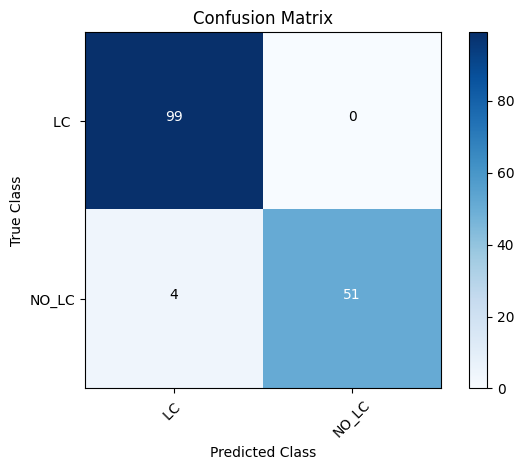

In [52]:
#XGB
classes = ["LC ", "NO_LC"]
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model1 = XGBClassifier (learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

#(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
fpr_Model1, tpr_Model1, thresholds_Model1 = roc_curve(y_test, y_pred)
roc_auc_Model1 = auc (fpr_Model1, tpr_Model1)
precision_Model1, recall_Model1, th_Model1 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

#confusion_matrix(Model1,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

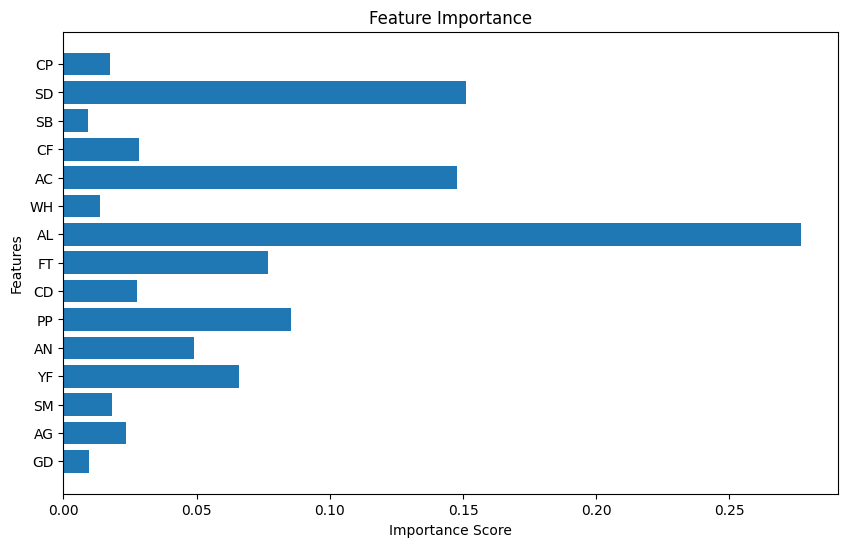

In [53]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = xgbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.89      1.00      0.94        49

    accuracy                           0.96       154
   macro avg       0.95      0.97      0.96       154
weighted avg       0.97      0.96      0.96       154

0.961038961038961


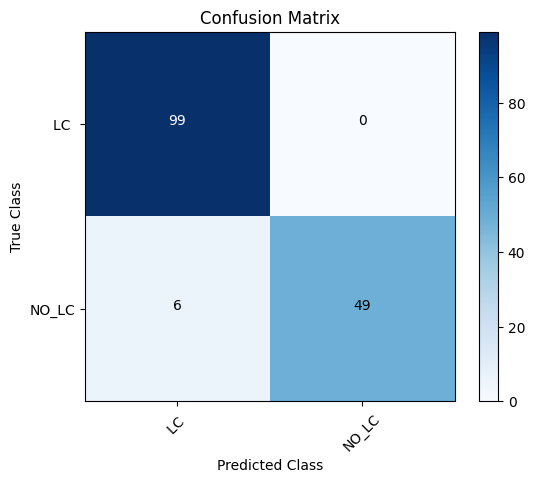

In [54]:
#Ada Boost
display_labels=["LC","NO_LC"]
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model2 = AdaBoostClassifier(n_estimators=20000,learning_rate=0.1,random_state=None)
#(random_state=0, learning_rate =0.1,n_estimators=100)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
fpr_Model2, tpr_Model2, thresholds_Model2 = roc_curve(y_test, y_pred)
roc_auc_Model2 = auc (fpr_Model2, tpr_Model2)
precision_Model2, recall_Model2, th_Model2 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
# confusion_matrix(Model2,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")



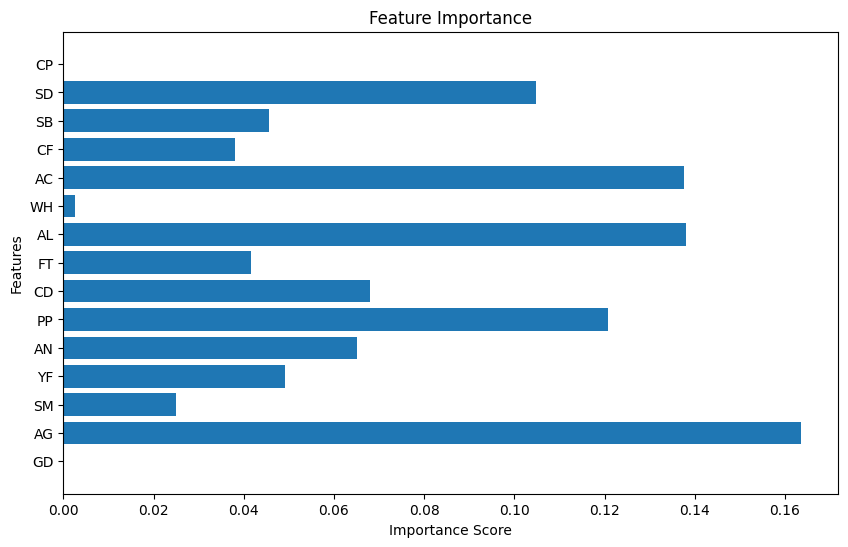

In [55]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = ada.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.98      1.00      0.99        54

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

0.9935064935064936


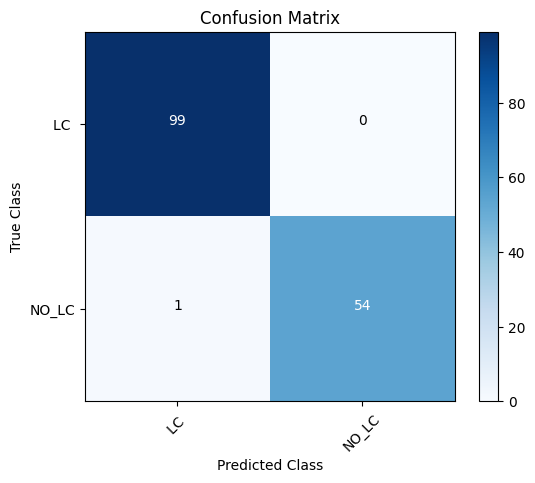

In [56]:
# GB Boost
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model3 = GradientBoostingClassifier(random_state=45, learning_rate =0.1,n_estimators=10000,max_depth=10)
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
fpr_Model3, tpr_Model3, thresholds_Model3 = roc_curve(y_test, y_pred)
roc_auc_Model3 = auc (fpr_Model3, tpr_Model3)
precision_Model3, recall_Model3, th_Model3 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model3,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


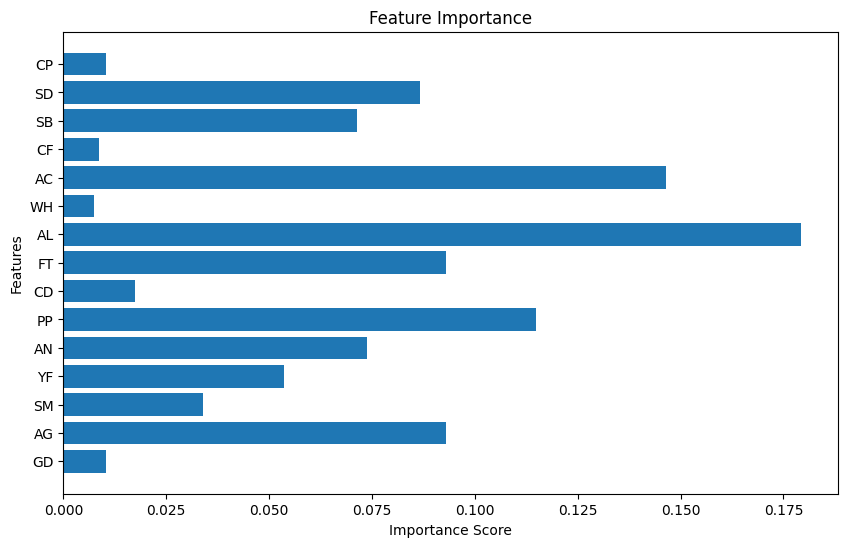

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = gbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       0.95      1.00      0.97        52

    accuracy                           0.98       154
   macro avg       0.97      0.99      0.98       154
weighted avg       0.98      0.98      0.98       154

0.9805194805194806


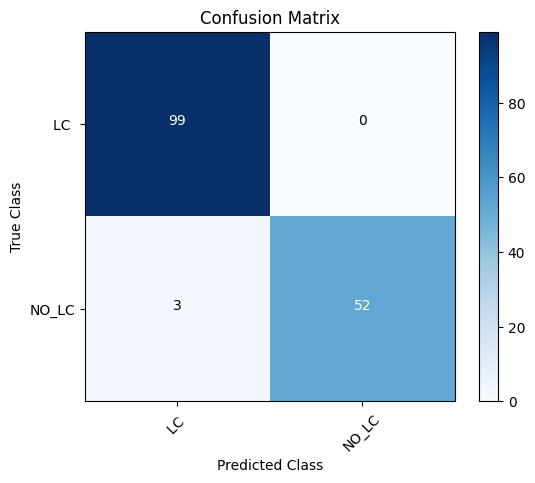

In [58]:
#LightGBM
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model4 = LGBMClassifier(random_state=45, n_estimators= 10000, max_depth=8)
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
fpr_Model4, tpr_Model4, thresholds_Model4 = roc_curve(y_test, y_pred)
roc_auc_Model4 = auc (fpr_Model4, tpr_Model4)
precision_Model4, recall_Model4, th_Model4 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model4,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


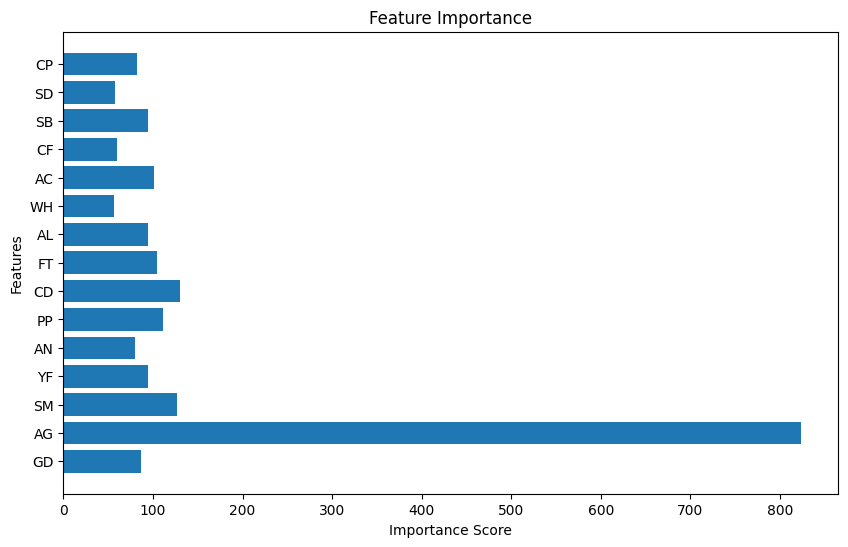

In [59]:
import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = lgb_reg.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


Learning rate set to 0.008377
0:	learn: 0.6809044	total: 48.9ms	remaining: 48.9s
1:	learn: 0.6708599	total: 53.3ms	remaining: 26.6s
2:	learn: 0.6597165	total: 57.7ms	remaining: 19.2s
3:	learn: 0.6513003	total: 61ms	remaining: 15.2s
4:	learn: 0.6417160	total: 64.5ms	remaining: 12.8s
5:	learn: 0.6325487	total: 75.2ms	remaining: 12.4s
6:	learn: 0.6231780	total: 79.2ms	remaining: 11.2s
7:	learn: 0.6141453	total: 82.4ms	remaining: 10.2s
8:	learn: 0.6038353	total: 85.5ms	remaining: 9.42s
9:	learn: 0.5957247	total: 89.2ms	remaining: 8.83s
10:	learn: 0.5867627	total: 92.1ms	remaining: 8.29s
11:	learn: 0.5778317	total: 99.7ms	remaining: 8.21s
12:	learn: 0.5695209	total: 102ms	remaining: 7.74s
13:	learn: 0.5601663	total: 106ms	remaining: 7.49s
14:	learn: 0.5524445	total: 110ms	remaining: 7.22s
15:	learn: 0.5450700	total: 114ms	remaining: 7.02s
16:	learn: 0.5368363	total: 118ms	remaining: 6.83s
17:	learn: 0.5296737	total: 124ms	remaining: 6.76s
18:	learn: 0.5212152	total: 126ms	remaining: 6.53s
1

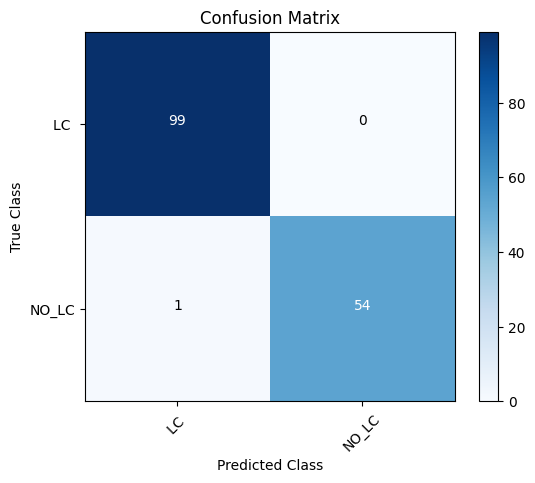

In [60]:
#CAT Boost
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model5 = CatBoostClassifier(random_state=45, n_estimators=1000, max_depth=7)
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
fpr_Model5, tpr_Model5, thresholds_Model5 = roc_curve(y_test, y_pred)
roc_auc_Model5 = auc (fpr_Model5, tpr_Model5)
precision_Model5, recall_Model5, th_Model5 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model5,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


Learning rate set to 0.037926
0:	learn: 0.4657626	total: 927us	remaining: 926ms
1:	learn: 0.4557910	total: 1.85ms	remaining: 923ms
2:	learn: 0.4454626	total: 2.74ms	remaining: 910ms
3:	learn: 0.4378385	total: 3.57ms	remaining: 890ms
4:	learn: 0.4284313	total: 12.7ms	remaining: 2.52s
5:	learn: 0.4199752	total: 15ms	remaining: 2.48s
6:	learn: 0.4116917	total: 23.9ms	remaining: 3.4s
7:	learn: 0.4039519	total: 24.9ms	remaining: 3.09s
8:	learn: 0.3964688	total: 25.8ms	remaining: 2.84s
9:	learn: 0.3885595	total: 26.6ms	remaining: 2.63s
10:	learn: 0.3811036	total: 27.6ms	remaining: 2.48s
11:	learn: 0.3741464	total: 28.6ms	remaining: 2.35s
12:	learn: 0.3665628	total: 29ms	remaining: 2.2s
13:	learn: 0.3586329	total: 35.9ms	remaining: 2.53s
14:	learn: 0.3525801	total: 36.8ms	remaining: 2.42s
15:	learn: 0.3459229	total: 37.8ms	remaining: 2.32s
16:	learn: 0.3402309	total: 38.7ms	remaining: 2.24s
17:	learn: 0.3345581	total: 46ms	remaining: 2.51s
18:	learn: 0.3299668	total: 46.9ms	remaining: 2.42s
1

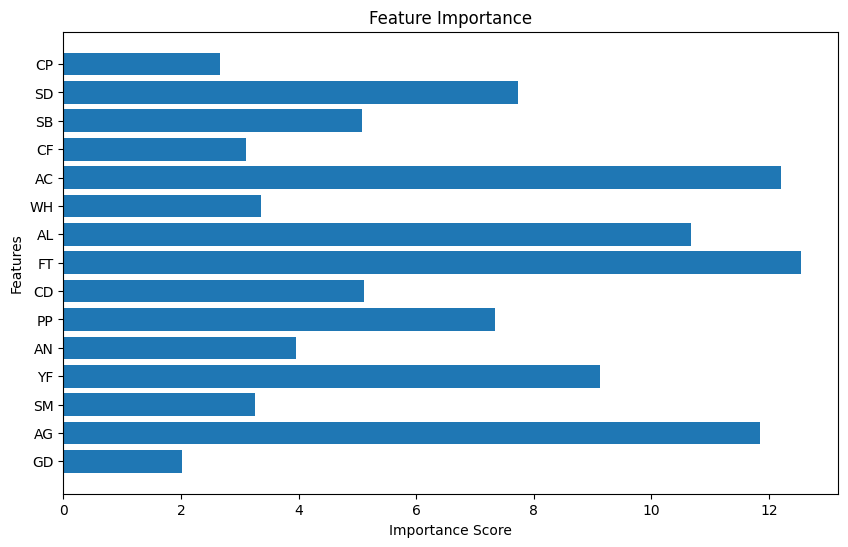

In [61]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = catboost.get_feature_importance()
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [62]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [63]:
X = data.drop(['LC'],axis=1)
Y = data['LC']

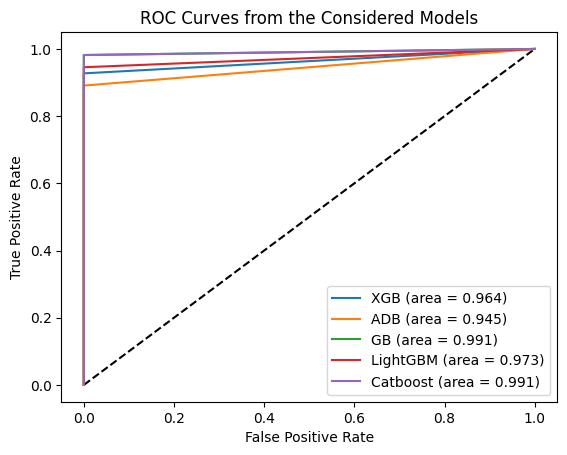

In [64]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Model1, tpr_Model1, label='XGB (area = %0.3f)' % roc_auc_Model1)
plt.plot(fpr_Model2, tpr_Model2, label='ADB (area = %0.3f)' % roc_auc_Model2)
plt.plot(fpr_Model3, tpr_Model3, label='GB (area = %0.3f)' % roc_auc_Model3)
plt.plot(fpr_Model4, tpr_Model4, label='LightGBM (area = %0.3f)' % roc_auc_Model4)
plt.plot(fpr_Model5, tpr_Model5, label='Catboost (area = %0.3f)' % roc_auc_Model5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves from the Considered Models')
plt.legend(loc='best')
plt.show()

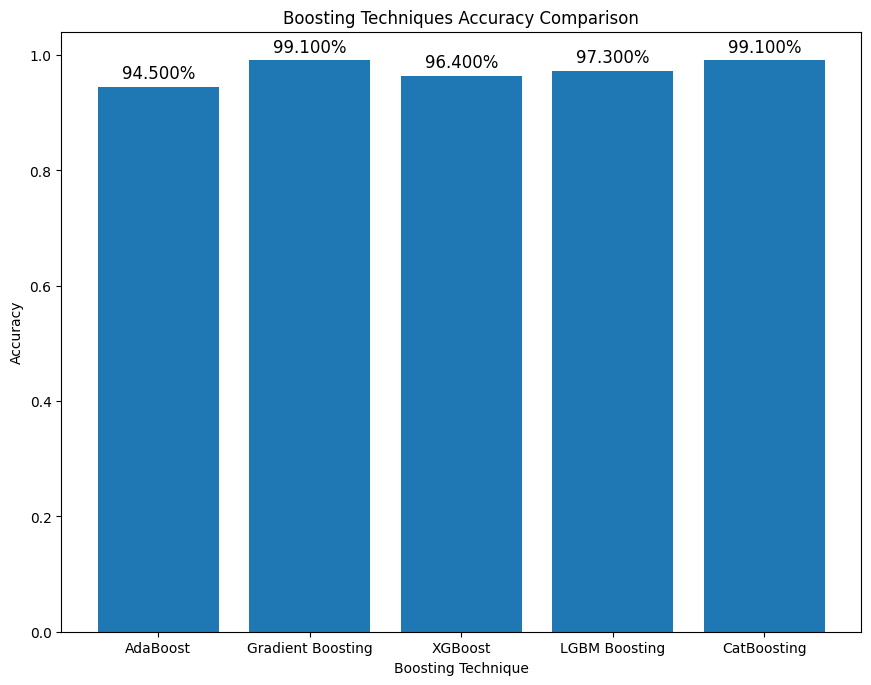

In [65]:
import matplotlib.pyplot as plt

# Sample accuracy data
adaboost_accuracy = 0.945
gradient_boosting_accuracy =0.991
xgboost_accuracy = 0.964
LGBM_boosting_accuracy =0.973
CatBoost_accuracy = 0.991

# Plot the bar graph with percentages
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost', 'LGBM Boosting', 'CatBoosting']
accuracies = [adaboost_accuracy, gradient_boosting_accuracy, xgboost_accuracy, LGBM_boosting_accuracy, CatBoost_accuracy]
bars = ax.bar(models, accuracies)

# Add percentage values on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.title('Boosting Techniques Accuracy Comparison')
plt.xlabel('Boosting Technique')
plt.ylabel('Accuracy')
plt.show()
